# The Sparks Foundation

# Graduate Rotational Internship Program

# Author:Mitesh Kumar Barnwal

# Task 1: Predict the percentage of a student based on the no. of study hours

In [31]:
#Linear Regression with Python Scikit Learn
#In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression
#functions. We will start with simple linear regression involving two variables.

<b> Importing all the required libraries

In [32]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
#All plots will be shown in this particular notebook
%matplotlib inline

#### Importing the dataset

In [33]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print('data')
#Printing the first five rows of data
data.head()

data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [35]:
data.shape

(25, 2)

In [36]:
#Calculate number of missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [37]:
#Descriptive analysis of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

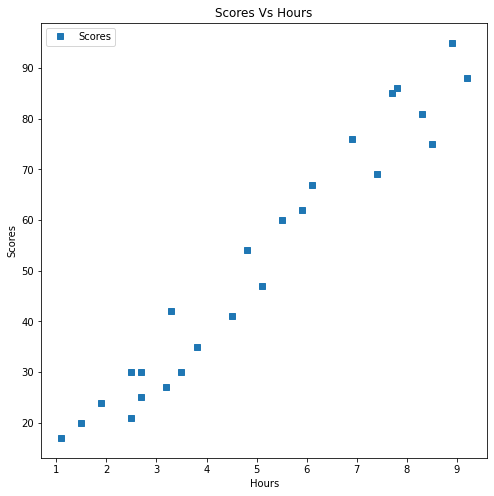

In [38]:
data.plot(x="Hours",y="Scores",style="s",figsize=(8,8))
plt.title("Scores Vs Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [39]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<b> From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [40]:
X= data.iloc[:,:-1] #Hours
y=data.iloc[:,1] #Scores

In [41]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [42]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=40) 

In [44]:
len(X_train),len(y_train)

(20, 20)

##Training the algorithm

<b> The dataset is splitted into training and test set and now our algorithm will be trained

In [45]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

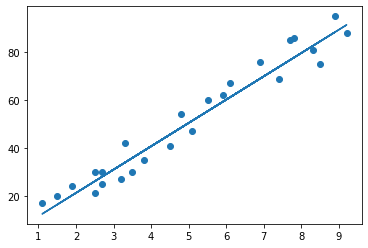

In [46]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions

<b> Now that we have trained our algorithm, it's time to make some predictions.

In [47]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
15    8.9
24    7.8
14    1.1
19    7.4
13    3.3


In [48]:
y_pred

array([88.44663283, 77.73202788, 12.47034316, 73.83580789, 33.89955306])

## Comparing the actual and predicted values

In [49]:
df = pd.DataFrame({"Actual_values":y_test,"Predicted_values":y_pred})

In [50]:
df

,Actual_values,Predicted_values
15,95,88.446633
24,86,77.732028
14,17,12.470343
19,69,73.835808
13,42,33.899553


In [51]:
#Predicted score of a student who studies 9.25 hrs/day
hrs = 9.25
pred_value = regressor.predict([[hrs]])
pred_value

array([91.85582532])

# Evaluating the model

In [52]:
from sklearn.metrics import mean_absolute_error

y_preds = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

6.457450193167183

In [53]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_pred})
df["Differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,Differences
15,95,88.446633,-6.553367
24,86,77.732028,-8.267972
14,17,12.470343,-4.529657
19,69,73.835808,4.835808
13,42,33.899553,-8.100447


In [54]:
abs(df["Differences"]).mean()

6.457450193167183

In [55]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

y_preds = regressor.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
mse

44.1652107906905

In [56]:
# Calcuate mse manually
squared = np.square(df["Differences"])
squared.mean()

44.1652107906905